# Custom exoplanet survey

EPOS was designed to work with different exoplanet surveys.

This notebook shows how to load a (mock) exoplanet catolog and (mock) survey detection efficiency.

In [1]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

initialize the EPOS class

In [2]:
epos= EPOS.epos(name='custom_survey')


 |~| epos 3.0.1.dev3 |~|

Initializing 'custom_survey'

Using random seed 4144380222
Survey: None selected


### Exoplanet catalog

Generate a mock exoplanet catalog with 131 planets detected in a survey of 18k stars

In [3]:
np.random.seed(76543)
nstars= 18000
npl= 231
period= 10.**np.random.normal(loc=0.8, scale=0.4, size=npl) # days
radius= 10.**np.random.normal(loc=0.4, scale=0.15, size=npl) # earth radii
starID= np.random.choice(np.arange(nstars/50), npl, replace=True) # star identifier for each planet to identify multis (can be any format)

Load the mock catalog into EPOS


Observations:
  18000 stars
  231 planets

  110 singles, 55 multis
  - single: 110
  - double: 47
  - triple: 5
  - quad: 3


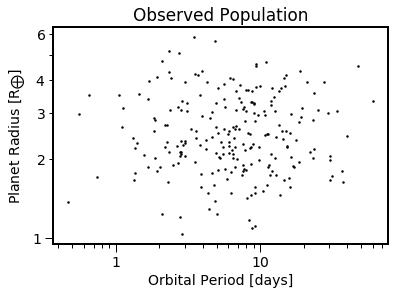

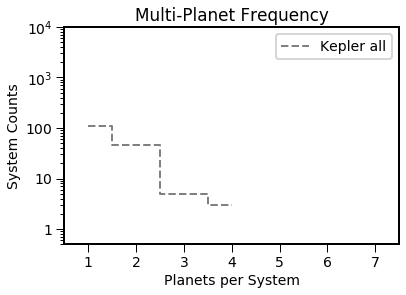

In [4]:
epos.set_observation(xvar=period, yvar=radius, starID=starID, nstars=nstars)
EPOS.plot.survey.observed(epos, NB=True, PlotBox=False)
EPOS.plot.multi.multiplicity(epos, NB=True)

### Detection efficiency

Generate a mock detection efficiency on a grid in period and radius

Note: the geometric detection efficiency factor is calculated by EPOS from the star mass and radius, so it does not need to be provided. 

In [5]:
period_grid= np.geomspace(0.5, 300, 17)
radius_grid= np.geomspace(0.3, 20, 19)
Rstar= 1 # solar radius
Mstar= 1 # solar mass

P, R= np.meshgrid(period_grid, radius_grid, indexing='ij')
detection_efficiency= scipy.stats.norm.cdf(np.log10(R), 
                loc=0.0+0.2*np.log10(P), scale=0.1)

#vetting_efficiency=None # optional
vetting_efficiency= np.minimum(1, (P/50)**-2)

Load and display the survey detection efficiency

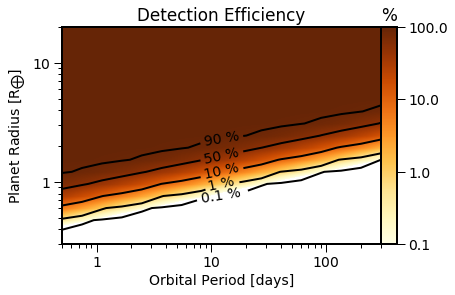

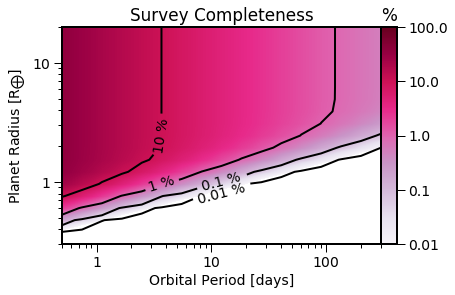

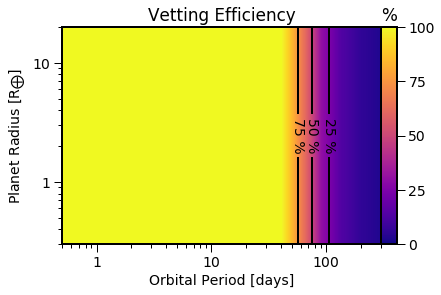

In [6]:
epos.set_survey(xvar= period_grid,
               yvar= radius_grid,
               eff_2D= detection_efficiency,
               vet_2D= vetting_efficiency,
               Rstar=Rstar, Mstar=Mstar
               )
EPOS.plot.survey.completeness(epos, NB=True, Transit=True, Vetting=False, PlotBox=False)
EPOS.plot.survey.completeness(epos, NB=True, Transit=False, Vetting=False, PlotBox=False)
EPOS.plot.survey.vetting(epos, PlotBox=False, NB=True)

Show the combined completeness

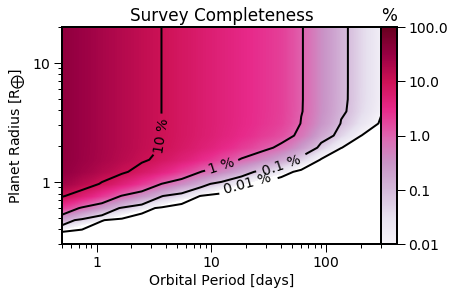

In [7]:
EPOS.plot.survey.completeness(epos, NB=True, Vetting=True, PlotBox=False)

### Occurrence Rates

Calculate Occurrence rates for the mock survey 

First define bins where to calculate occurrence rates

In [8]:
epos.set_bins(xbins=[[5,20]], ybins=[[1.4,6]])

Define regions where observational comparisons are made (also used for some occurrence rate calculations)

In [9]:
epos.set_ranges(
    xtrim=[0,730],ytrim=[0.3,20.], # trim the detection efficiency grid
    xzoom=[1,100],yzoom=[1,4], # zoomed region for occurrence rates
    Occ=True) # calculate occurrence along period and radius grid

Calculate occurrence rates

In [10]:
EPOS.occurrence.all(epos)


Interpolating planet occurrence

  Observed Planets
  x: [5,20], y: [1.4,6], n=123, comp=0.05, occ=0.16

  x zoom bins
  x: [1,100], y: [0.3,0.38], n=0, comp=nan, occ=0
  x: [1,100], y: [0.38,0.48], n=0, comp=nan, occ=0
  x: [1,100], y: [0.48,0.6], n=0, comp=nan, occ=0
  x: [1,100], y: [0.6,0.76], n=0, comp=nan, occ=0
  x: [1,100], y: [0.76,0.96], n=0, comp=nan, occ=0
  x: [1,100], y: [0.96,1.2], n=5, comp=0.02, occ=0.039
  x: [1,100], y: [1.2,1.5], n=11, comp=0.036, occ=0.023
  x: [1,100], y: [1.5,1.9], n=39, comp=0.062, occ=0.091
  x: [1,100], y: [1.9,2.4], n=61, comp=0.08, occ=0.066
  x: [1,100], y: [2.4,3.1], n=49, comp=0.074, occ=0.049
  x: [1,100], y: [3.1,3.9], n=37, comp=0.077, occ=0.038
  x: [1,100], y: [3.9,4.9], n=21, comp=0.082, occ=0.021
  x: [1,100], y: [4.9,6.2], n=4, comp=0.11, occ=0.0021
  x: [1,100], y: [6.2,7.9], n=0, comp=nan, occ=0
  x: [1,100], y: [7.9,9.9], n=0, comp=nan, occ=0
  x: [1,100], y: [9.9,13], n=0, comp=nan, occ=0
  x: [1,100], y: [13,16], n=0, comp=n

/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Plot the planet catalog with color-coded completeness

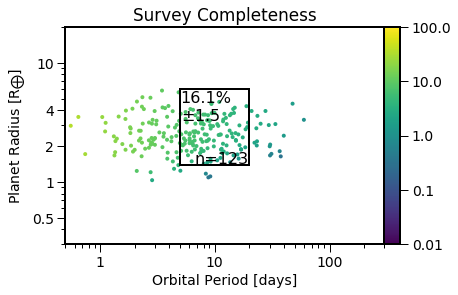

In [11]:
EPOS.plot.occurrence.colored(epos, Bins=True, NB=True)

And plot the occurrence rates as function of period and radius

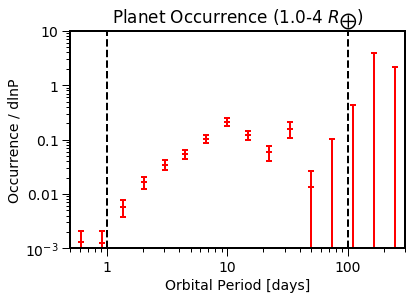

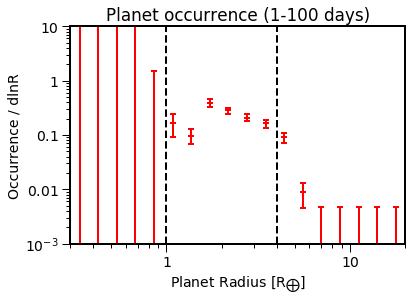

In [12]:
EPOS.plot.parametric.oneD_x(epos, NB=True, Occ=True, Init=False)
EPOS.plot.parametric.oneD_y(epos, NB=True, Occ=True, Init=False)